# 🚖 GoodCabs Trips & Passenger Analysis

This project analyzes the **GoodCabs dataset** using **Polars** and **Matplotlib/Seaborn**.  

---

## 📂 Datasets Used
- city_info.csv
- city_target_passenger_rating.csv
- dim_city.csv
- dim_date.csv
- dim_repeat_trip_distribution.csv
- fact_passenger_summary.csv
- fact_trips.csv
- monthly_target_new_passenger.csv
- monthly_target_trips.csv


## 1. Import Libraries & Load Data

In [58]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSVs
city_info = pl.read_csv("data/city_info.csv")
city_rating = pl.read_csv("data/city_target_passenger_rating.csv")
dim_city = pl.read_csv("data/dim_city.csv")
dim_date = pl.read_csv("data/dim_date.csv")
repeat_dist = pl.read_csv("data/dim_repeat_trip_distribution.csv")
passenger_summary = pl.read_csv("data/fact_passenger_summary.csv")
trips = pl.read_csv("data/fact_trips.csv")
target_new_passenger = pl.read_csv("data/monthly_target_new_passengers.csv")
target_trips = pl.read_csv("data/monthly_target_trips.csv")


print("✅ All data loaded")


✅ All data loaded


## 2. Overview of Trips

In [59]:
print(trips.describe())
print(trips.head())



shape: (9, 9)
┌────────────┬───────────┬───────────┬─────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ statistic  ┆ trip_id   ┆ date      ┆ city_id ┆ … ┆ distance_ ┆ fare_amou ┆ passenger ┆ driver_ra │
│ ---        ┆ ---       ┆ ---       ┆ ---     ┆   ┆ travelled ┆ nt        ┆ _rating   ┆ ting      │
│ str        ┆ str       ┆ str       ┆ str     ┆   ┆ (km)      ┆ ---       ┆ ---       ┆ ---       │
│            ┆           ┆           ┆         ┆   ┆ ---       ┆ f64       ┆ f64       ┆ f64       │
│            ┆           ┆           ┆         ┆   ┆ f64       ┆           ┆           ┆           │
╞════════════╪═══════════╪═══════════╪═════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ count      ┆ 425903    ┆ 425903    ┆ 425903  ┆ … ┆ 425903.0  ┆ 425903.0  ┆ 425903.0  ┆ 425903.0  │
│ null_count ┆ 0         ┆ 0         ┆ 0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ mean       ┆ null      ┆ null      ┆ null    ┆ … ┆ 19.127172 ┆ 254.02049 ┆ 

## 3. Total Trips & Fare by City

In [60]:
trips_city = trips.group_by("city_id").agg([
    pl.count("trip_id").alias("total_trips"),
    pl.sum("fare_amount").alias("total_revenue")
]).join(dim_city, on="city_id")

trips_city.sort("total_trips", descending=True).head(10)


city_id,total_trips,total_revenue,city_name
str,u32,i64,str
"""RJ01""",76888,37207497,"""Jaipur"""
"""UP01""",64299,9463551,"""Lucknow"""
"""GJ01""",54843,6431599,"""Surat"""
"""KL01""",50702,16997596,"""Kochi"""
"""MP01""",42456,7635228,"""Indore"""
"""CH01""",38981,11058401,"""Chandigarh"""
"""GJ02""",32026,3797200,"""Vadodara"""
"""AP01""",28366,8018282,"""Visakhapatnam"""
"""TN01""",21104,3523992,"""Coimbatore"""


## 4. Passenger Summary (New vs Repeat)


In [61]:
passenger_stats = passenger_summary.join(dim_city, on="city_id").with_columns(
    (pl.col("repeat_passengers") / pl.col("total_passengers") * 100).alias("repeat_percentage")
)

passenger_stats.sort("repeat_percentage", descending=True).head(10)


month,city_id,new_passengers,repeat_passengers,total_passengers,city_name,repeat_percentage
str,str,i64,i64,i64,str,f64
"""2024-05-01""","""GJ01""",1611,1606,3217,"""Surat""",49.922288
"""2024-06-01""","""GJ01""",1540,1490,3030,"""Surat""",49.174917
"""2024-05-01""","""UP01""",1825,1662,3487,"""Lucknow""",47.662747
"""2024-06-01""","""UP01""",1971,1727,3698,"""Lucknow""",46.700919
"""2024-04-01""","""GJ01""",1843,1551,3394,"""Surat""",45.698291
"""2024-05-01""","""MP01""",2028,1563,3591,"""Indore""",43.52548
"""2024-03-01""","""GJ01""",1946,1494,3440,"""Surat""",43.430233
"""2024-04-01""","""UP01""",2311,1496,3807,"""Lucknow""",39.296034
"""2024-06-01""","""GJ02""",1104,703,1807,"""Vadodara""",38.904261


## 5. Top Cities by Trips

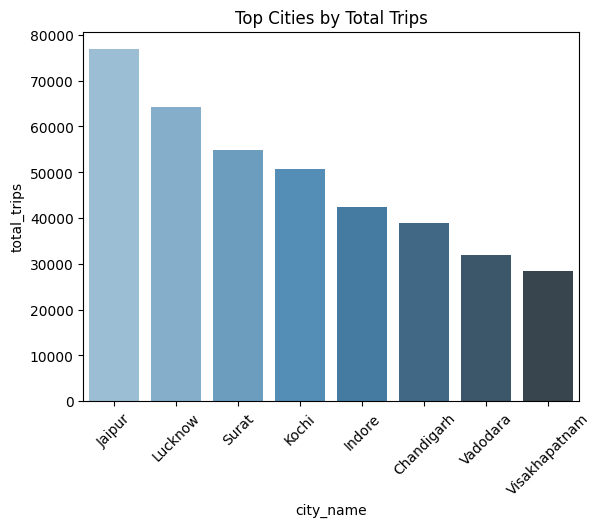

In [62]:
sns.barplot(
    data=trips_city.to_pandas().sort_values("total_trips", ascending=False).head(8),
    x="city_name", 
    y="total_trips", 
    palette="Blues_d",
    hue="city_name",       
    dodge=False 
)
plt.title("Top Cities by Total Trips")
plt.xticks(rotation=45)
plt.show()


## 6. Repeat Trip Distribution

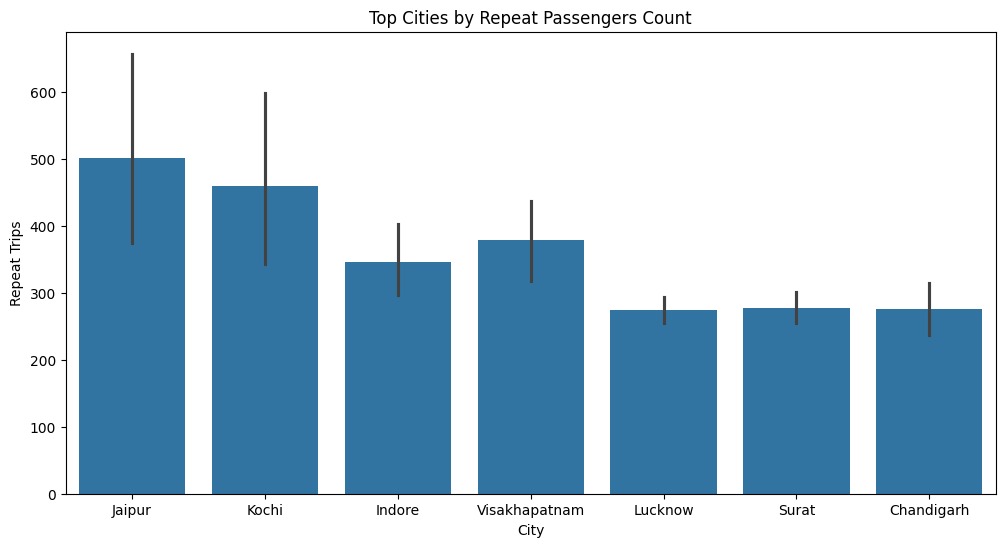

In [65]:
# Join tables on city_id
city_repeat = repeat_dist.join(dim_city, on="city_id")

# Sort by repeat_trips descending and take top 5 (or desired number)
top_cities = city_repeat.sort("repeat_passenger_count", descending=True).head(100)

# Convert to Pandas for Seaborn plotting
top_cities_pd = top_cities.to_pandas()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_cities_pd,
    x="city_name",
    y="repeat_passenger_count",
)
plt.title("Top Cities by Repeat Passengers Count")
plt.xlabel("City")
plt.ylabel("Repeat Trips")
plt.show()

## 7. Fare Amount vs Distance Travelled by Passenger Type

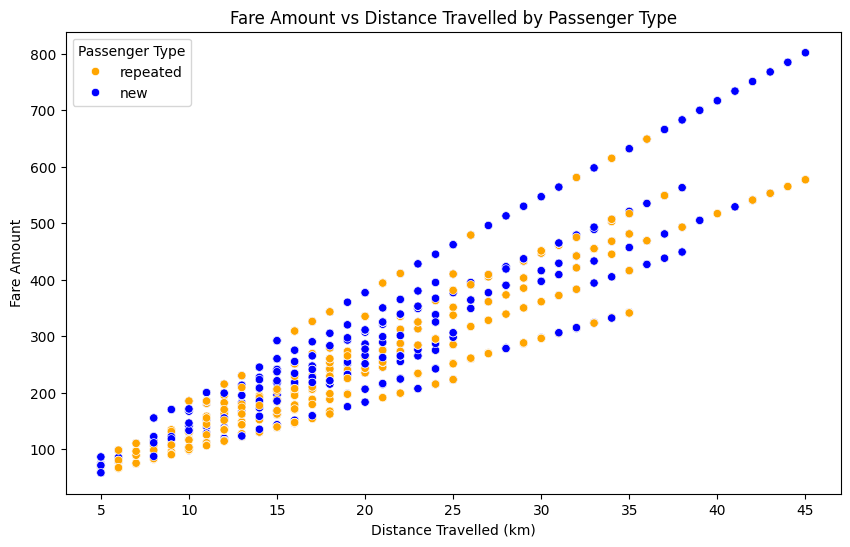

In [64]:
trips_pd = trips.to_pandas()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=trips_pd,
    x="distance_travelled(km)",
    y="fare_amount",
    hue="passenger_type",  
    palette={"new": "blue", "repeated": "orange"}
)

plt.title("Fare Amount vs Distance Travelled by Passenger Type")
plt.xlabel("Distance Travelled (km)")
plt.ylabel("Fare Amount")
plt.legend(title="Passenger Type")
plt.show()
